In [3]:
import pickle
import numpy as np
import os
import pandas as pd
from IPython.display import display, Image

# Phase d'encodage

In [ ]:
import face_recognition


def encode_with_ref(name):
    Database="/home/maachou/ml/Projet_S4/face-database/"
    folder=Database+name+"/"
    num_pictures=len(os.listdir(folder))
    X=np.zeros((num_pictures,128))
    references={}
    k=0
    for photo in os.listdir(folder):
        pickle.load(open("Encodages_"+name+".pkl",'rb'))
        references[k]=folder+photo
        if face_recognition.api.face_encodings(face_recognition.load_image_file(folder+photo))!=[] and np.array(face_recognition.api.face_encodings(face_recognition.load_image_file(folder+photo))).shape[0]!=2: 
                    X[k,:]=np.array(face_recognition.api.face_encodings(face_recognition.load_image_file(folder+photo)))
                    
        else:
                print("Cette photo est mal encodé par l'encodeur -> output shape : ",np.array(face_recognition.api.face_encodings(face_recognition.load_image_file(folder+photo))).shape[0])
                display(Image(filename=folder+photo))
        k+=1
        print("progression de l'encodage: "+str((k/num_pictures)*100)+'% \r ',end='\r')
    return X,references


    

In [ ]:
name="rafael benítez"
X,references=encode_with_ref(name)

In [ ]:
print("The size of X: ",X.shape)
print("The number of pictures in the folder: ",X.shape[0])
print("The output dimension of Face_recognition: ",X.shape[1])


In [ ]:
f = open("Encodages_"+name+".pkl","wb")
pickle.dump(X,f)
f.close()

In [ ]:
f = open("ref_"+name+".pkl","wb")
pickle.dump(references,f)
f.close()

In [ ]:
name="constance wu"
X,references=encode_with_ref(name)
f = open("Encodages_"+name+".pkl","wb")
pickle.dump(X,f)
f.close()
f = open("ref_"+name+".pkl","wb")
pickle.dump(references,f)
f.close()

In [ ]:
name="pepe"
X,references=encode_with_ref(name)
f = open("Encodages_"+name+".pkl","wb")
pickle.dump(X,f)
f.close()
f = open("ref_"+name+".pkl","wb")
pickle.dump(references,f)
f.close()

In [ ]:
print(references)

# Phase de visualisation:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
name="rafael benítez"
X=pickle.load(open("Encodages_"+name+".pkl",'rb'))
references=pickle.load(open("ref_"+name+".pkl",'rb'))

In [7]:
print(X.shape)


(53, 128)


In [8]:
from PIL import Image as im
import numpy as np

def load_image( infilename ) :
    img = im.open( infilename )
    
    data = np.asarray( img, dtype="int32" )
    return data

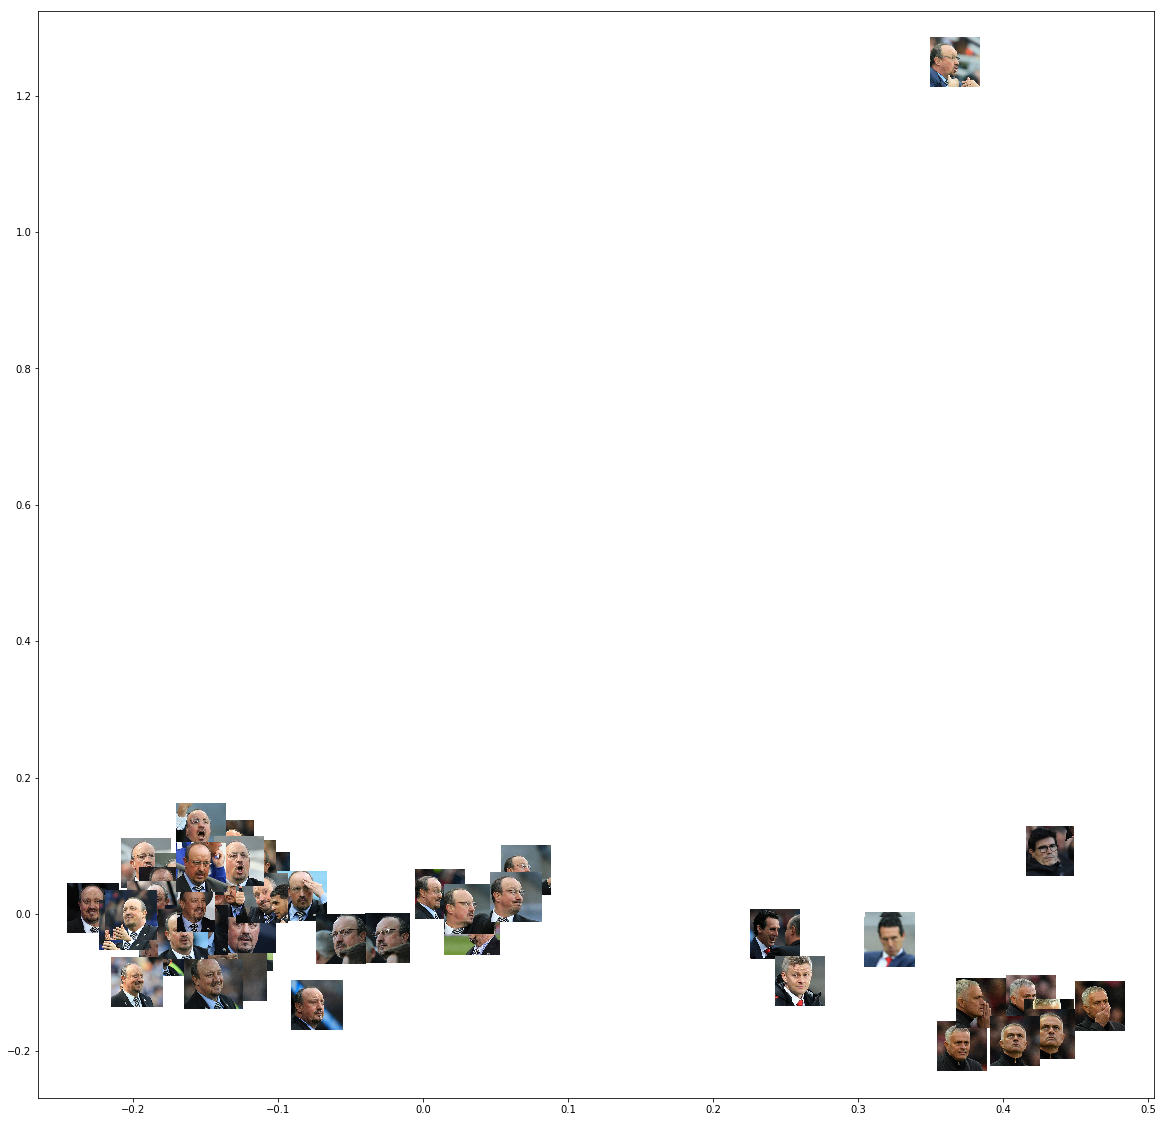

In [10]:
from sklearn.decomposition import PCA
import skimage
from skimage import io
from skimage.viewer import ImageViewer

from IPython.display import display, Image
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import MeanShift
cluster=MeanShift()
cluster.fit(X)
Y=cluster.predict(X)
ax = plt.subplot(111)
for k in references.keys():
    image=io.imread(references[k])
    shape_ori = image.shape
    scale = 1000 / (2 * shape_ori[0])
    shape_dest = (int(shape_ori[0] * scale), int(shape_ori[1] * scale), 3)
    scaled_image = skimage.transform.resize(image, shape_dest, order=1, mode='reflect',
                                            anti_aliasing=False)
    image_box = OffsetImage(scaled_image, zoom=0.1)
    ab = AnnotationBbox(image_box,X_reduced[k], frameon=False)
    ax.add_artist(ab)
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)

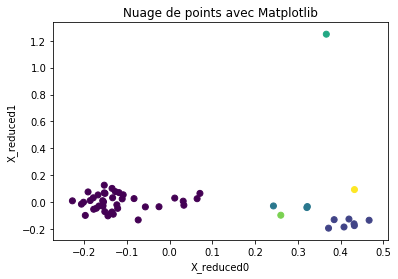

In [11]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=Y)
plt.title('Nuage de points avec Matplotlib')
plt.xlabel('X_reduced0')
plt.ylabel('X_reduced1')
plt.show()

In [ ]:
name="pepe"
X=pickle.load(open("Encodages_"+name+".pkl",'rb'))
references=pickle.load(open("ref_"+name+".pkl",'rb'))

In [ ]:
from sklearn.decomposition import PCA
import skimage
from skimage import io
from skimage.viewer import ImageViewer

from IPython.display import display, Image
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import MeanShift
cluster=MeanShift()
cluster.fit(X)
Y=cluster.predict(X)
ax = plt.subplot(111)
for k in references.keys():
    image=io.imread(references[k])
    shape_ori = image.shape
    scale = 1000 / (2 * shape_ori[0])
    shape_dest = (int(shape_ori[0] * scale), int(shape_ori[1] * scale), 3)
    scaled_image = skimage.transform.resize(image, shape_dest, order=1, mode='reflect',
                                            anti_aliasing=False)
    image_box = OffsetImage(scaled_image, zoom=0.1)
    ab = AnnotationBbox(image_box,X_reduced[k], frameon=False)
    ax.add_artist(ab)
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)

In [ ]:
from sklearn.decomposition import PCA
import skimage
from skimage import io
from skimage.viewer import ImageViewer

from IPython.display import display, Image
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(20,20))
from sklearn.cluster import MeanShift
cluster=MeanShift()
cluster.fit(X)
Y=cluster.predict(X)
ax = plt.subplot(111)
for k in references.keys():
    image=io.imread(references[k])
    shape_ori = image.shape
    scale = 1000 / (2 * shape_ori[0])
    shape_dest = (int(shape_ori[0] * scale), int(shape_ori[1] * scale), 3)
    scaled_image = skimage.transform.resize(image, shape_dest, order=1, mode='reflect',
                                            anti_aliasing=False)
    image_box = OffsetImage(scaled_image, zoom=0.1)
    ab = AnnotationBbox(image_box,X_reduced[k], frameon=False)
    ax.add_artist(ab)
ax.scatter(np.array(X_reduced[:,0]),np.array(X_reduced[:,1]),c=Y)